# Movies Recommendation System

### Project Details
| Project | Information |
| :--- | :--- |
| Project Title | Movies Recommender system |
| Technologies | ML, NLP, Recommender Systems |
| Domain | Entertainment |
| Project Difficulties | Level Advance |


### Introduction
Recommendation System is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item. 

In our case, this domain-specific item is a movie.

Therefore, the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

In layman’s terms, we can say that a Recommendation System is a tool designed to predict/filter the items as per the user’s behavior.

### Why Do We Need Recommender Systems?

We now live in what some call the “era of abundance”. For any given product, there are sometimes thousands of options to choose from. Think of the examples above: streaming videos, social networking, online shopping; the list goes on. Recommender systems help to personalize a platform and help the user find something they like.

The easiest and simplest way to do this is to recommend the most popular items. However, to really enhance the user experience through personalized recommendations, we need dedicated recommender systems.

From a business standpoint, the more relevant products a user finds on the platform, the higher their engagement. This often results in increased revenue for the platform itself. Various sources say that as much as 35–40% of tech giants’ revenue comes from recommendations alone.

### Problem Statement!

Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System

### Project Objective
To build a movie recommendation system with main focus to filter and predict personalized lists of useful and interesting content specific movies which a user would prefer based on some data provided about the user.

### Types of Recommender Systems
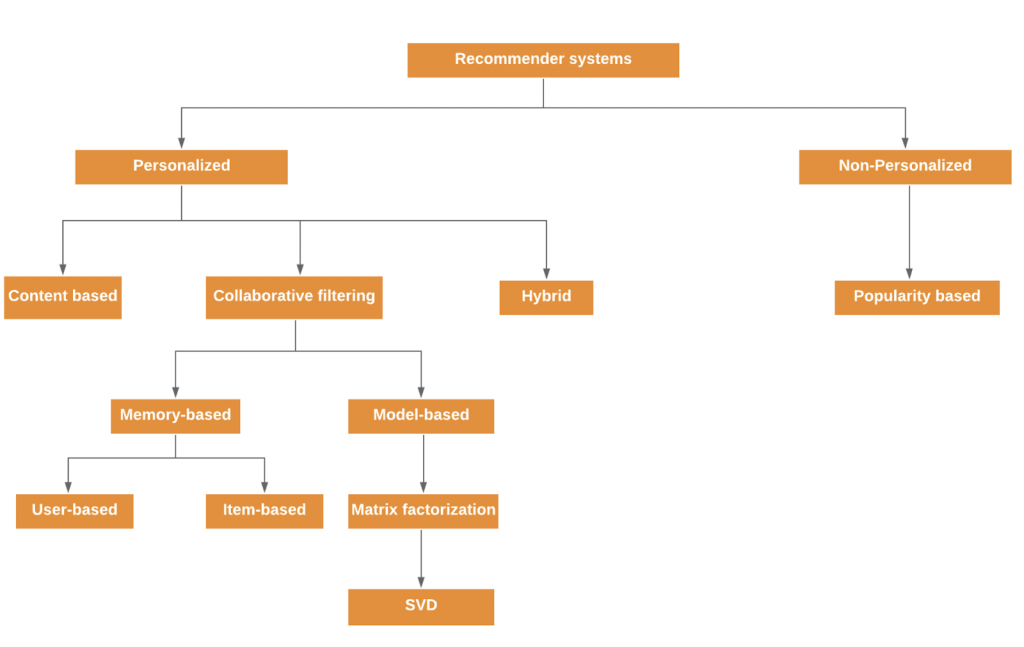

__Content-Based Filtering:__ This approach recommends movies based on the similarity of their content. It involves analyzing movie attributes such as genre, actors, director, plot keywords, and ratings. By comparing these attributes with a user's preferences, the system recommends movies that have similar characteristics to the ones they have liked in the past.

__Collaborative Filtering:__ Collaborative filtering recommends movies based on the behavior and preferences of similar users. There are two types of collaborative filtering:
1. _User-Based Collaborative Filtering:_ This method finds users who have similar movie preferences to the target user and recommends movies they have enjoyed but the target user has not seen. 

2. _Item-Based Collaborative Filtering:_ This method identifies similar movies based on user ratings and recommends items that are similar to the movies the target user has already rated or watched. 
  
__Hybrid Approaches:__ Hybrid recommender systems combine multiple techniques to provide more accurate recommendations. For example, you can combine content-based filtering and collaborative filtering to leverage both movie attributes and user preferences.


### Dataset Information

#### The Movies Dataset
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

This dataset consists of the following files:

__movies_metadata.csv:__ The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

__keywords.csv:__ Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

__credits.csv:__ Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

__links.csv:__ The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

#### Importing Important Libraries

In [1]:
# !pip install scikit-surprise

In [2]:
# !pip install surprise

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

import ast
from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')

from scipy import sparse

import nltk
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import warnings; warnings.simplefilter('ignore')

In [4]:
credits = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\credits.csv')
credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [5]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [6]:
def cast_names(data):
    actors = []
    counter = 0
    for i in ast.literal_eval(data):
        if counter != 3:
            actors.append(i['name'])
            counter += 1
    return actors 

In [7]:
credits['actors'] = credits['cast'].apply(cast_names)

In [8]:
credits['crew'] = credits['crew'].apply(literal_eval)

In [9]:
# def crew_names(data):
#     director = []
#     for i in ast.literal_eval(data):
#         if i['job'] == "Director":
#             director.append(i['name'])
#             break
#     return director

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [10]:
# credits['crew'] = credits['crew'].apply(crew_names)
credits['director'] = credits['crew'].apply(get_director)

In [11]:
credits.head(3)

,cast,crew,id,actors,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch


In [12]:
keywords = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\keywords.csv')
keywords.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [13]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [14]:
def name_convert(data):
    keywords = []
    for i in ast.literal_eval(data):
        keywords.append(i['name'])
    return keywords 

In [15]:
keywords['keywords_type'] = keywords['keywords'].apply(name_convert)

In [16]:
keywords.head(3)

,id,keywords,keywords_type
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o..."


In [17]:
links = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\links.csv')
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [18]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [19]:
links_small = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\links_small.csv')
links_small.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [20]:
links_small.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [21]:
movies_metadata = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\movies_metadata.csv')
movies_metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [22]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [23]:
movies_meta = movies_metadata.copy()
columns_drop = ['belongs_to_collection', 'imdb_id', 'homepage', 'original_title', 'poster_path', 'video']
movies_meta = movies_meta.drop(columns_drop, axis = 1)
movies_meta.head(2)

,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


In [24]:
def genre_convert(data):
    genre = []
    for i in ast.literal_eval(data):
        genre.append(i['name'])
    return genre 

In [25]:
movies_meta['genres_category'] = movies_meta['genres'].apply(genre_convert)
movies_meta['production_country'] = movies_meta['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_meta['production_house'] = movies_meta['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_meta['languages_category'] = movies_meta['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [26]:
movies_meta['release_date'] = pd.to_datetime(movies_meta['release_date'], errors = 'coerce')
movies_meta['release_year'] = movies_meta['release_date'].dt.year
movies_meta['release_month'] = movies_meta['release_date'].dt.month
movies_meta['release_day_of_week'] = movies_meta['release_date'].dt.day_name()

In [27]:
movies_meta.isnull().sum()

adult                       0
budget                      0
genres                      0
id                          0
original_language          11
overview                  954
popularity                  5
production_companies        3
production_countries        3
release_date               90
revenue                     6
runtime                   263
spoken_languages            6
status                     87
tagline                 25054
title                       6
vote_average                6
vote_count                  6
genres_category             0
production_country          0
production_house            0
languages_category          0
release_year               90
release_month              90
release_day_of_week        90
dtype: int64

In [28]:
movies_meta["runtime"] = movies_meta["runtime"].replace(0, np.nan)
movies_meta["runtime"].fillna(movies_meta["runtime"].mean(), inplace=True)

In [29]:
movies_meta.dropna(subset=["release_year"],inplace=True)
movies_meta.dropna(subset=["original_language"],inplace=True)

In [30]:
movies_meta['tagline'] = movies_meta['tagline'].fillna('')
movies_meta['overview'] = movies_meta['overview'].fillna('')

In [31]:
movies_meta.head(3)

,adult,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,title,vote_average,vote_count,genres_category,production_country,production_house,languages_category,release_year,release_month,release_day_of_week
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995.0,10.0,Monday
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...","[English, Français]",1995.0,12.0,Friday
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",[United States of America],"[Warner Bros., Lancaster Gate]",[English],1995.0,12.0,Friday


In [32]:
# movies_meta['adult'].value_counts()

In [33]:
# movies_meta['status'].value_counts()

In [34]:
movies_meta = movies_meta.drop(['adult', 'genres', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status'], axis=1)
movies_meta.head(3)

,budget,id,original_language,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,genres_category,production_country,production_house,languages_category,release_year,release_month,release_day_of_week
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995.0,10.0,Monday
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Adventure, Fantasy, Family]",[United States of America],"[TriStar Pictures, Teitler Film, Interscope Co...","[English, Français]",1995.0,12.0,Friday
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Romance, Comedy]",[United States of America],"[Warner Bros., Lancaster Gate]",[English],1995.0,12.0,Friday


In [35]:
ratings_small = pd.read_csv(r'F:\Priya\Courses\Innomatics\Final Project\The Movies Dataset\Data\Dataset\ratings_small.csv')
ratings_small.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [36]:
ratings_small.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### Merging Data

##### Credits and Keywords

In [37]:
credits.shape

(45476, 5)

In [38]:
keywords.shape

(46419, 3)

In [39]:
credits_k  = credits.merge(keywords, on = 'id')
credits_k.head(3)

,cast,crew,id,actors,director,keywords,keywords_type
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[jealousy, toy, boy, friendship, friends, riva..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[board game, disappearance, based on children'..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[fishing, best friend, duringcreditsstinger, o..."


In [40]:
credits_k = credits_k.drop(['cast', 'crew', 'keywords'], axis=1)
credits_k.head(3)

,id,actors,director,keywords_type
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger, o..."


##### Links and Ratings_small

In [41]:
links.shape

(45843, 3)

In [42]:
links  = links.merge(ratings_small, on = 'movieId')
links.head(3)

,movieId,imdbId,tmdbId,userId,rating,timestamp
0,1,114709,862.0,7,3.0,851866703
1,1,114709,862.0,9,4.0,938629179
2,1,114709,862.0,13,5.0,1331380058


In [43]:
links.rename(columns = {'tmdbId':'id'}, inplace = True)

In [44]:
credits_f = credits_k.merge(links, on = 'id')
credits_f.head(3)

,id,actors,director,keywords_type,movieId,imdbId,userId,rating,timestamp
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,114709,7,3.0,851866703
1,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,114709,9,4.0,938629179
2,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,114709,13,5.0,1331380058


In [45]:
credits_f = credits_f.drop(['imdbId'], axis=1)
credits_f.head(3)

,id,actors,director,keywords_type,movieId,userId,rating,timestamp
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,7,3.0,851866703
1,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,9,4.0,938629179
2,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,13,5.0,1331380058


In [46]:
credits_f.shape

(99962, 8)

In [47]:
credits_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99962 entries, 0 to 99961
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99962 non-null  int64  
 1   actors         99962 non-null  object 
 2   director       99936 non-null  object 
 3   keywords_type  99962 non-null  object 
 4   movieId        99962 non-null  int64  
 5   userId         99962 non-null  int64  
 6   rating         99962 non-null  float64
 7   timestamp      99962 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


##### Credits_f and Movies_Metadata

In [48]:
movies_meta.shape

(45365, 18)

In [49]:
credits_f['id'] = credits_f['id'].astype(str)
movies_meta['id'] = movies_meta['id'].astype(str)
final_data = pd.merge(credits_f, movies_meta, on = 'id')
final_data.head(3)

,id,actors,director,keywords_type,movieId,userId,rating,timestamp,budget,original_language,...,title,vote_average,vote_count,genres_category,production_country,production_house,languages_category,release_year,release_month,release_day_of_week
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,7,3.0,851866703,30000000,en,...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995.0,10.0,Monday
1,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,9,4.0,938629179,30000000,en,...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995.0,10.0,Monday
2,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,13,5.0,1331380058,30000000,en,...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995.0,10.0,Monday


In [50]:
# duplicated_records = final_data[final_data.duplicated()]
# print(duplicated_records.head(3))

In [51]:
# final_data.duplicated().sum()

In [52]:
null_counts = final_data.isna().sum()
print(null_counts)

id                      0
actors                  0
director               26
keywords_type           0
movieId                 0
userId                  0
rating                  0
timestamp               0
budget                  0
original_language       0
overview                0
popularity              0
revenue                 0
runtime                 0
tagline                 0
title                   0
vote_average            0
vote_count              0
genres_category         0
production_country      0
production_house        0
languages_category      0
release_year            0
release_month           0
release_day_of_week     0
dtype: int64


In [53]:
final_data.dropna(inplace=True)

In [54]:
final_data = final_data.drop(['timestamp'], axis=1)

In [55]:
final_data.isnull().sum()

id                     0
actors                 0
director               0
keywords_type          0
movieId                0
userId                 0
rating                 0
budget                 0
original_language      0
overview               0
popularity             0
revenue                0
runtime                0
tagline                0
title                  0
vote_average           0
vote_count             0
genres_category        0
production_country     0
production_house       0
languages_category     0
release_year           0
release_month          0
release_day_of_week    0
dtype: int64

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100096 entries, 0 to 100121
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100096 non-null  object 
 1   actors               100096 non-null  object 
 2   director             100096 non-null  object 
 3   keywords_type        100096 non-null  object 
 4   movieId              100096 non-null  int64  
 5   userId               100096 non-null  int64  
 6   rating               100096 non-null  float64
 7   budget               100096 non-null  object 
 8   original_language    100096 non-null  object 
 9   overview             100096 non-null  object 
 10  popularity           100096 non-null  object 
 11  revenue              100096 non-null  float64
 12  runtime              100096 non-null  float64
 13  tagline              100096 non-null  object 
 14  title                100096 non-null  object 
 15  vote_average         1

In [57]:
final_data['popularity'] = final_data['popularity'].astype(float)
final_data['budget'] = final_data['budget'].astype(float)
final_data['id'] = final_data['id'].astype(int)
final_data['release_year'] = final_data['release_year'].astype(int)
final_data['release_month'] = final_data['release_month'].astype(int)

In [58]:
final_data.head(3)

,id,actors,director,keywords_type,movieId,userId,rating,budget,original_language,overview,...,title,vote_average,vote_count,genres_category,production_country,production_house,languages_category,release_year,release_month,release_day_of_week
0,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,7,3.0,30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995,10,Monday
1,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,9,4.0,30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995,10,Monday
2,862,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy, friendship, friends, riva...",1,13,5.0,30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,7.7,5415.0,"[Animation, Comedy, Family]",[United States of America],[Pixar Animation Studios],[English],1995,10,Monday


In [59]:
final_data.shape

(100096, 24)

In [60]:
final_data = final_data[['id', 'movieId', 'userId', 'title', 'rating', 'actors', 'director', 'genres_category', 'original_language', 'languages_category', 'overview', 'tagline', 'keywords_type', 'production_country', 'production_house','popularity', 'runtime', 'revenue', 'budget', 'vote_average', 'vote_count', 'release_year', 'release_month', 'release_day_of_week']]
final_data.head(3)

,id,movieId,userId,title,rating,actors,director,genres_category,original_language,languages_category,...,production_house,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week
0,862,1,7,Toy Story,3.0,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[Animation, Comedy, Family]",en,[English],...,[Pixar Animation Studios],21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
1,862,1,9,Toy Story,4.0,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[Animation, Comedy, Family]",en,[English],...,[Pixar Animation Studios],21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
2,862,1,13,Toy Story,5.0,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[Animation, Comedy, Family]",en,[English],...,[Pixar Animation Studios],21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday


#### EDA

#### Univariate Analysis

In [61]:
final_data.describe()

,id,movieId,userId,rating,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month
count,100096.000000,100096.000000,100096.000000,100096.000000,100096.000000,100096.000000,1.000960e+05,1.000960e+05,100096.000000,100096.000000,100096.000000,100096.000000
mean,13177.170776,12555.830483,346.960218,3.542954,13.169119,114.865587,1.647468e+08,3.329643e+07,6.873705,1549.226223,1991.815038,7.278393
std,31778.016064,26432.947705,195.199304,1.058155,14.245079,25.245548,2.396478e+08,4.294071e+07,0.840589,2065.088548,15.123871,3.260467
min,2.000000,1.000000,1.000000,0.500000,0.000004,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1902.000000,1.000000
25%,675.000000,1029.000000,182.000000,3.000000,7.523098,98.000000,1.000000e+07,2.200000e+06,6.400000,208.000000,1987.000000,5.000000
50%,4967.000000,2409.000000,367.000000,4.000000,10.956665,111.000000,6.995975e+07,1.800000e+07,6.900000,692.000000,1995.000000,7.000000
75%,11318.000000,5444.000000,520.000000,4.000000,14.811594,127.000000,2.294000e+08,5.000000e+07,7.500000,1974.000000,2001.000000,10.000000
max,416437.000000,163949.000000,671.000000,5.000000,547.488298,1140.000000,2.787965e+09,3.800000e+08,10.000000,14075.000000,2016.000000,12.000000


In [62]:
total_users = len(np.unique(final_data["userId"]))
print("The count of unique userID in the dataset is : ", total_users)
print("The top 5 userID in the dataset are : \n", final_data["userId"].value_counts()[:5])

The count of unique userID in the dataset is :  671
The top 5 userID in the dataset are : 
 userId
547    2397
564    1873
624    1743
15     1709
73     1599
Name: count, dtype: int64


In [63]:
total_movies = len(np.unique(final_data["title"]))
print("The count of unique movie title in the dataset is : ", total_movies)
print("The top 5 movie title in the dataset are : \n", final_data["title"].value_counts()[:5])

The count of unique movie title in the dataset is :  8731
The top 5 movie title in the dataset are : 
 title
Forrest Gump                341
Pulp Fiction                324
The Shawshank Redemption    311
The Silence of the Lambs    304
Star Wars                   291
Name: count, dtype: int64


In [64]:
total_movies = len(np.unique(final_data["movieId"]))
print("The count of unique movieID in the dataset is : ", total_movies)
print("The top 5 movieID in the dataset are : \n", final_data["movieId"].value_counts()[:5])

The count of unique movieID in the dataset is :  9001
The top 5 movieID in the dataset are : 
 movieId
356    341
296    324
318    311
593    304
260    291
Name: count, dtype: int64


In [65]:
final_data['rating'].value_counts()

rating
4.0    28810
3.0    20071
5.0    15086
3.5    10517
4.5     7725
2.0     7304
2.5     4463
1.0     3322
1.5     1694
0.5     1104
Name: count, dtype: int64

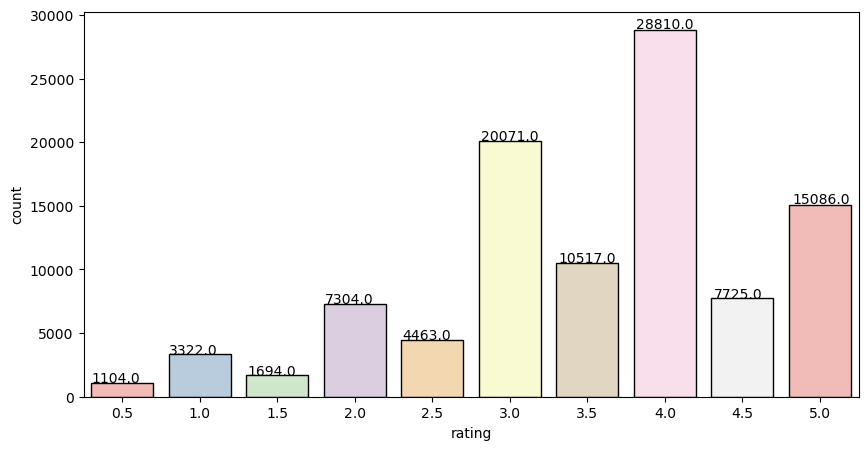

In [66]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x = 'rating', data = final_data, palette='Pastel1', edgecolor = 'black')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

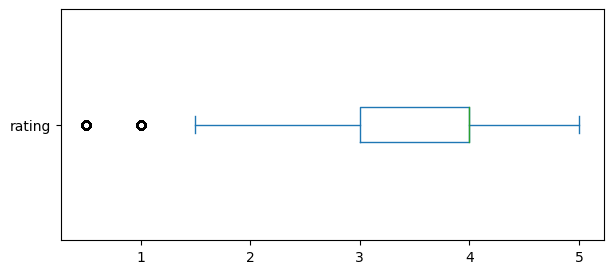

In [67]:
plt.figure(figsize=(7, 3))
final_data.rating.plot.box(vert=False)
plt.show()

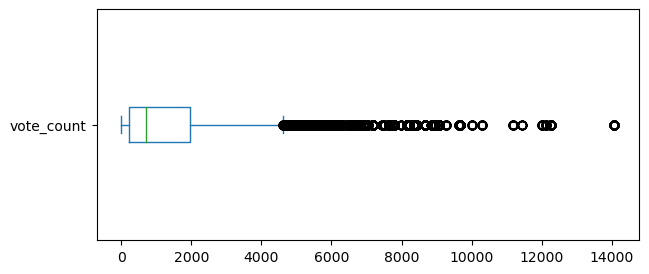

In [68]:
plt.figure(figsize=(7, 3))
final_data.vote_count.plot.box(vert=False)
plt.show()

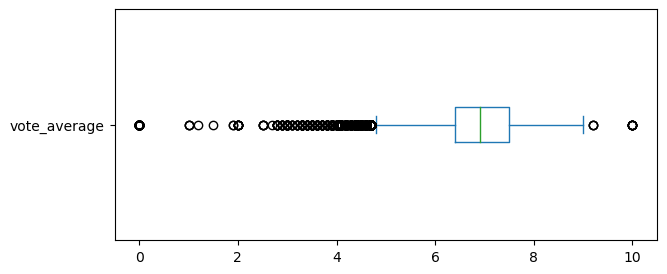

In [69]:
plt.figure(figsize=(7, 3))
final_data.vote_average.plot.box(vert=False)
plt.show()

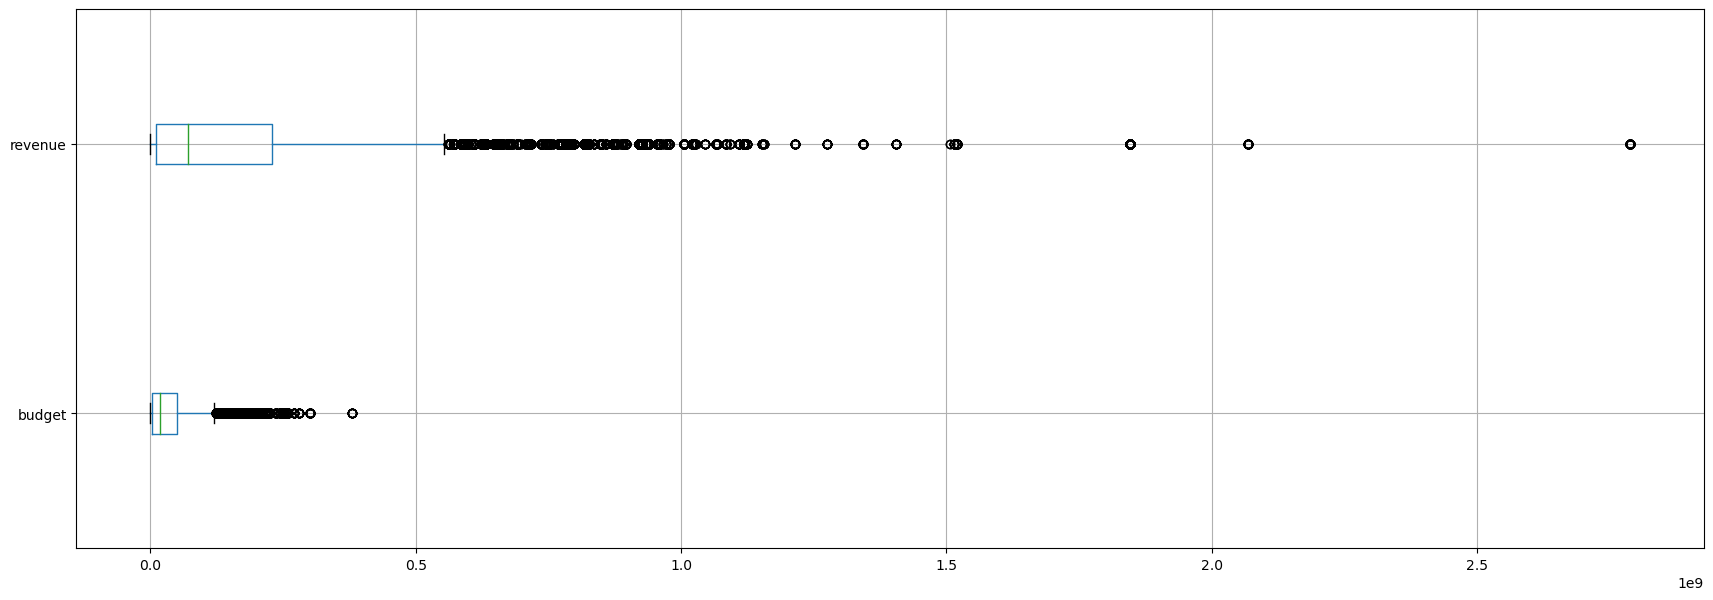

In [70]:
plt.figure(figsize=(21, 7))
boxplot_movies_final_data = pd.DataFrame(data = final_data, columns = ['budget', 'revenue'])
boxplot_movies_final_data.boxplot(vert=False)
plt.show()

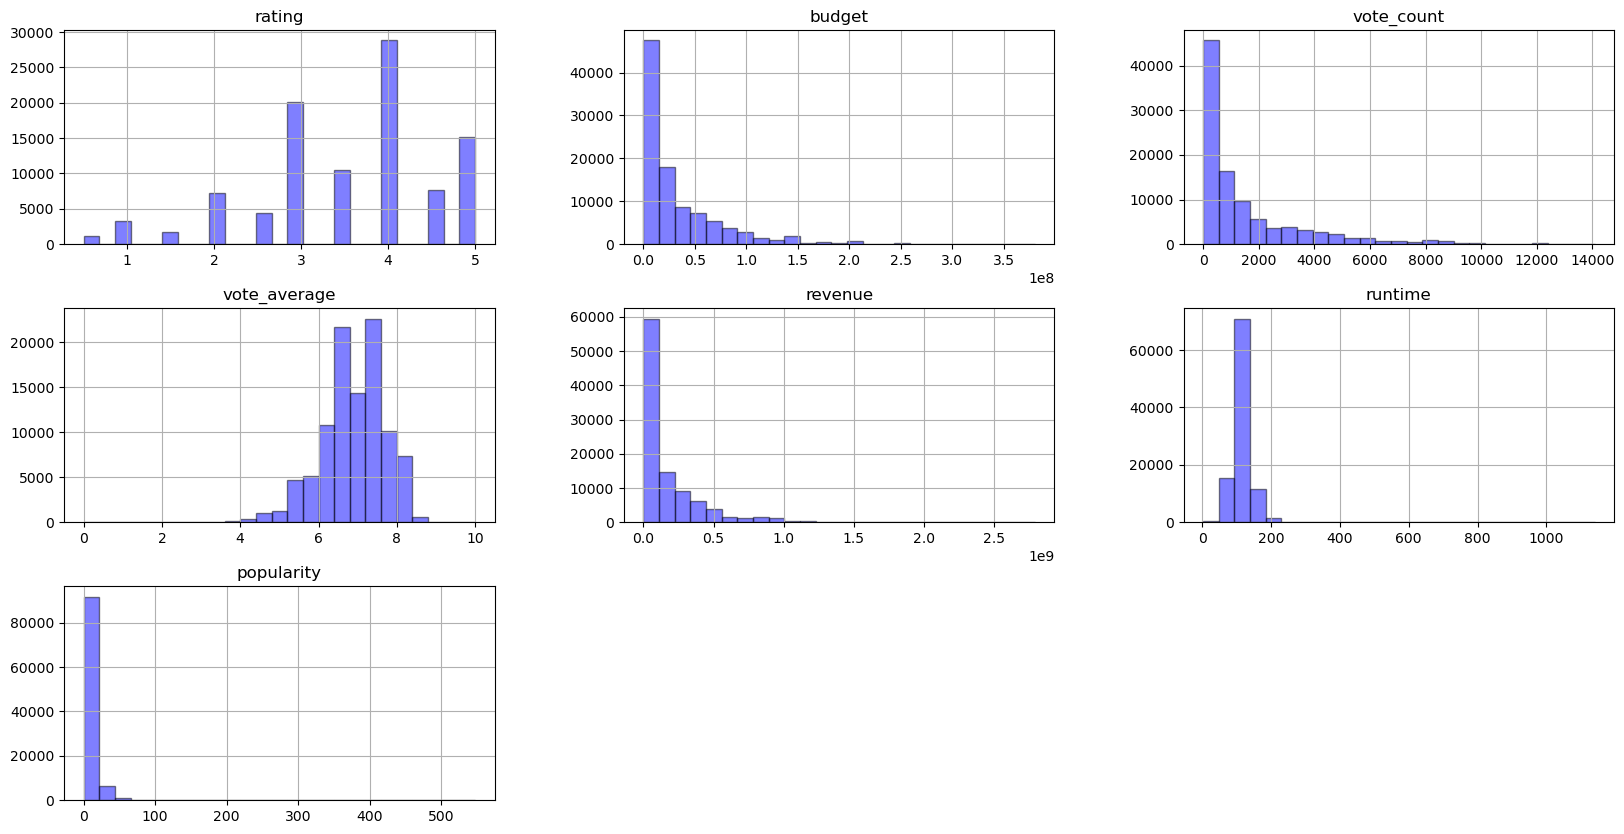

In [71]:
final_data.hist(column=['rating', 'budget', 'vote_count', 'vote_average', 'revenue', 'runtime', 'popularity'], bins = 25, color = 'blue', alpha=0.5, edgecolor='black', figsize = (20, 10))
plt.show()

In [72]:
final_data['genres_category'].value_counts()

genres_category
[Drama]                                                            6149
[Comedy]                                                           5069
[Comedy, Drama, Romance]                                           3212
[Comedy, Drama]                                                    2940
[Drama, Romance]                                                   2736
                                                                   ... 
[Comedy, Drama, Foreign, Music]                                       1
[Crime, Drama, Family]                                                1
[Fantasy, Comedy, Documentary, Science Fiction, Music]                1
[Family, Adventure, Comedy, Fantasy]                                  1
[Action, Animation, Adventure, Drama, Fantasy, Science Fiction]       1
Name: count, Length: 1705, dtype: int64

In [73]:
def list_counter(col, limiter = 9999, log = True):
    result = dict()
    for cell in col:
        if isinstance(cell, float):
            continue
        for element in cell:
            if element in result:
                result[element] += 1
            else:
                result[element] = 1
    if log:
        print("Size of words:", len(result))
    result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
    if log:
        print("Sorted result is:")
    counter = 1
    sum_selected = 0
    total_selected = 0
    rest = 0
    returned = []
    for i in result: 
        if counter > limiter:
            total_selected += result[i]
        else:
            counter += 1
            sum_selected += result[i]
            total_selected += result[i]
            if log:
                print(result[i], " - ", i) 
            returned.append([i, result[i]])
    if log:
        print("Covered:", sum_selected, "out of", total_selected, "\n")
    return returned

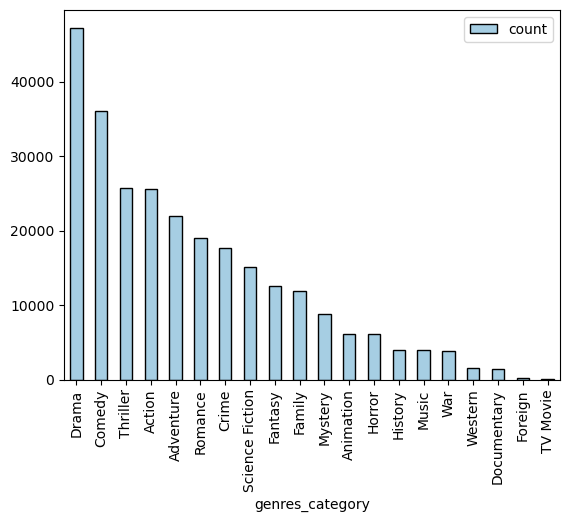

In [74]:
genres_categories = list_counter(final_data["genres_category"].values, log=False)
genres = pd.DataFrame.from_records(genres_categories, columns=["genres_category", "count"])
genres.plot(kind = 'bar', x="genres_category", colormap='Paired', edgecolor='Black')
plt.show()

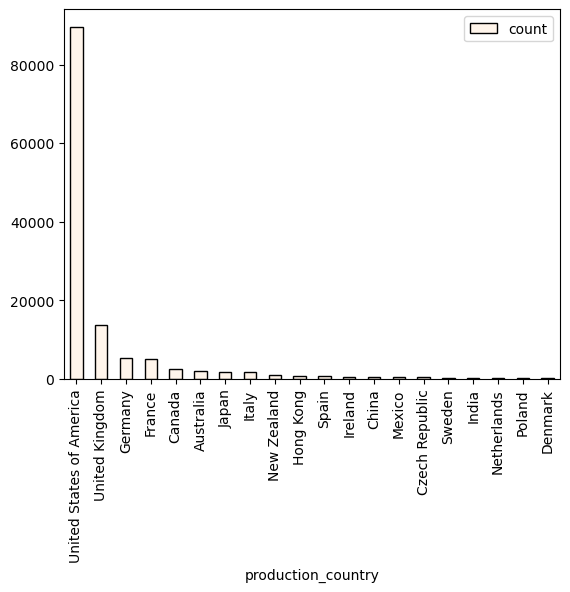

In [75]:
countries_production = list_counter(final_data["production_country"].values, log=False)
production = pd.DataFrame.from_records(countries_production, columns=["production_country", "count"])
production.head(20).plot(kind = 'bar', x="production_country", colormap = 'Oranges', edgecolor='Black')
plt.show()

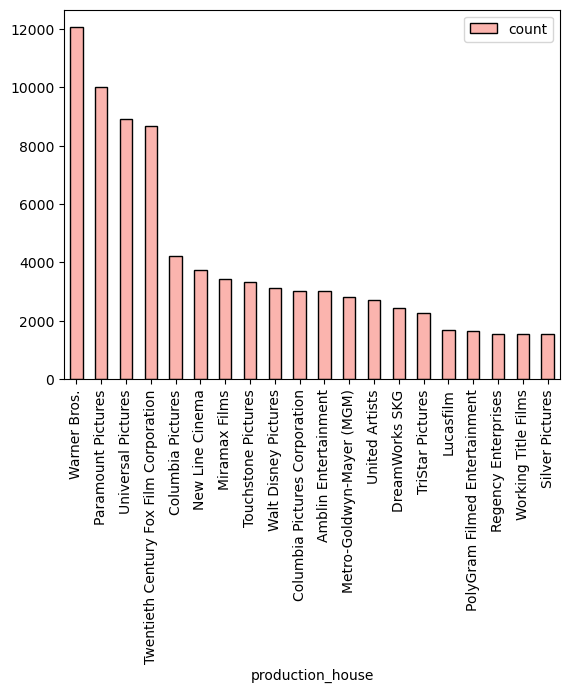

In [76]:
production_companies = list_counter(final_data["production_house"].values, log=False)
companies = pd.DataFrame.from_records(production_companies, columns=["production_house", "count"])
companies.head(20).plot(kind = 'bar', x="production_house", colormap = 'Pastel1', edgecolor='Black')
plt.show()

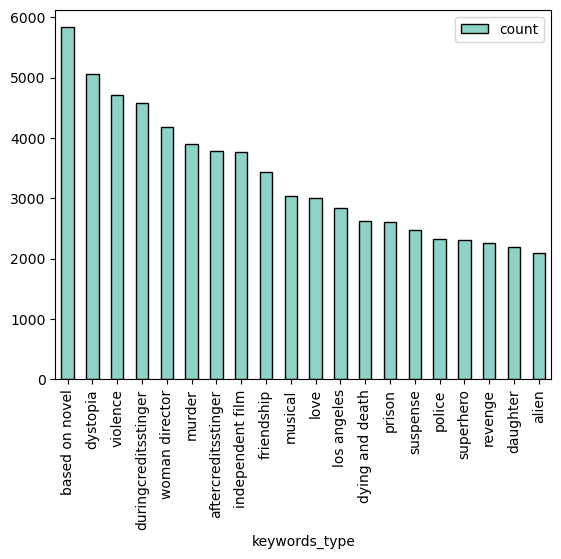

In [77]:
keywords_category = list_counter(final_data["keywords_type"].values, log=False)
keywords = pd.DataFrame.from_records(keywords_category, columns=["keywords_type", "count"])
keywords.head(20).plot(kind = 'bar', x="keywords_type", colormap = 'Set3', edgecolor='Black')
plt.show()

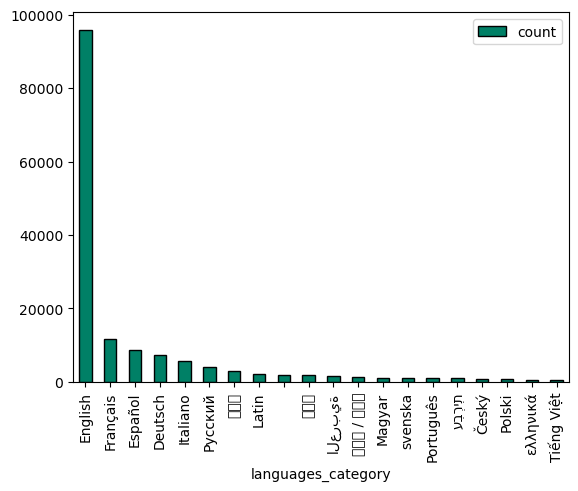

In [78]:
language_types = list_counter(final_data["languages_category"].values, log=False)
language = pd.DataFrame.from_records(language_types, columns=["languages_category", "count"])
language.head(20).plot(kind = 'bar', x="languages_category", colormap = 'summer', edgecolor='Black')
plt.show()

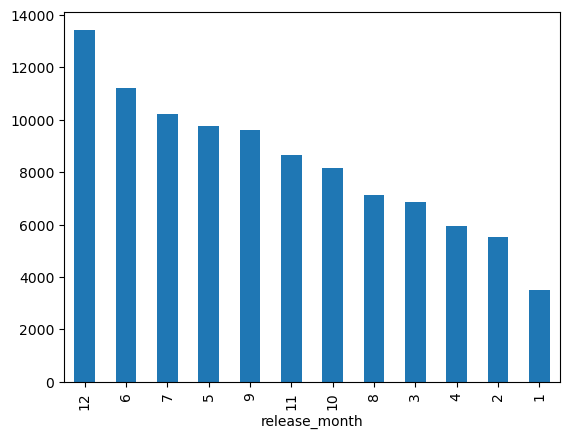

In [79]:
final_data['release_month'].value_counts().plot(kind='bar')
plt.show()

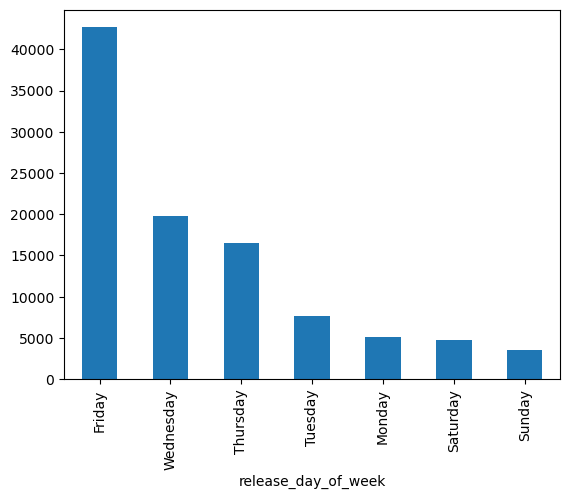

In [80]:
final_data['release_day_of_week'].value_counts().plot(kind='bar')
plt.show()

#### Bivariate Analysis

<Axes: xlabel='runtime'>

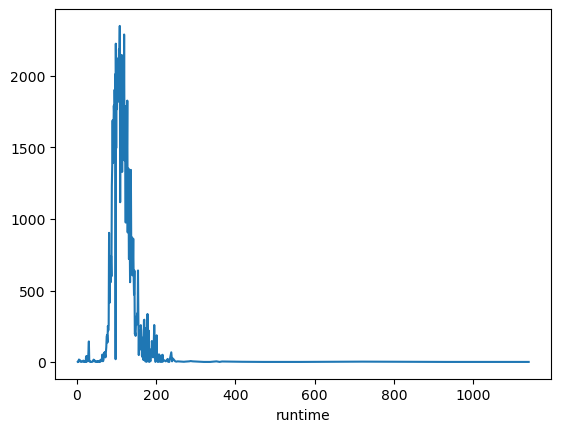

In [81]:
data_groupby_duration = final_data.groupby(['runtime'])['title'].count()
data_groupby_duration.plot()

<Axes: xlabel='release_year'>

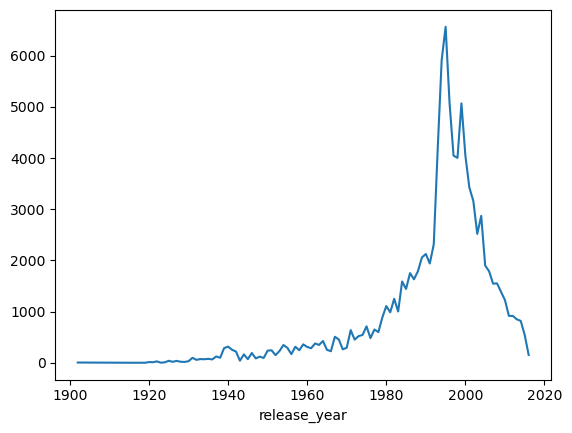

In [82]:
data_groupby_budget = final_data.groupby(['release_year'])['budget'].count()
data_groupby_budget.plot()

In [83]:
# data_groupby_budget = final_data.groupby(['title'])['budget'].count()
# data_groupby_budget.head(5).plot(kind = 'bar')

<Axes: xlabel='release_year'>

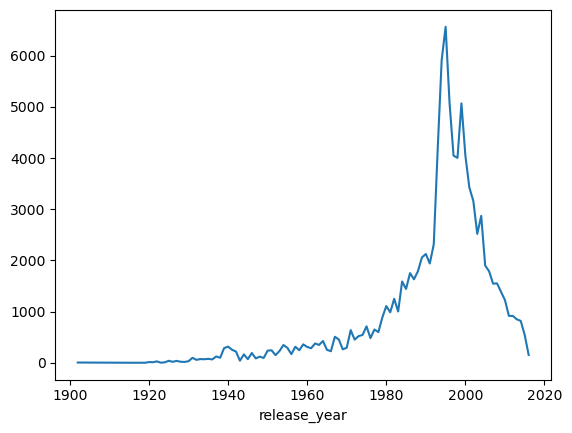

In [84]:
data_groupby_revenue = final_data.groupby(['release_year'])['revenue'].count()
data_groupby_revenue.plot()

In [85]:
# data_groupby_revenue = final_data.groupby(['title'])['revenue'].count()
# data_groupby_revenue.head(5).plot(kind = 'bar')

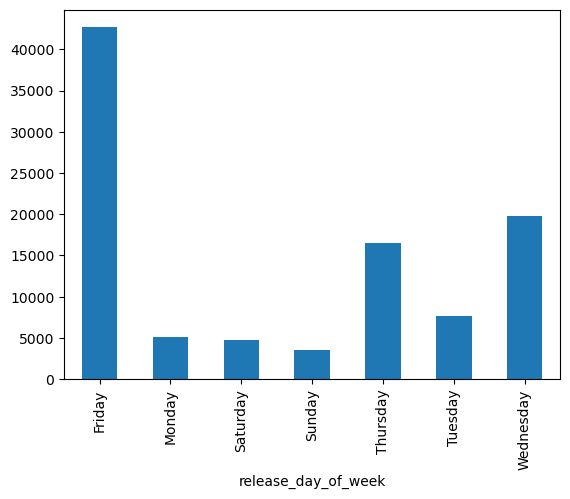

In [86]:
data_groupby_day_of_week = final_data.groupby(['release_day_of_week'])['runtime'].count()
data_groupby_day_of_week.plot(kind = 'bar')
plt.show()

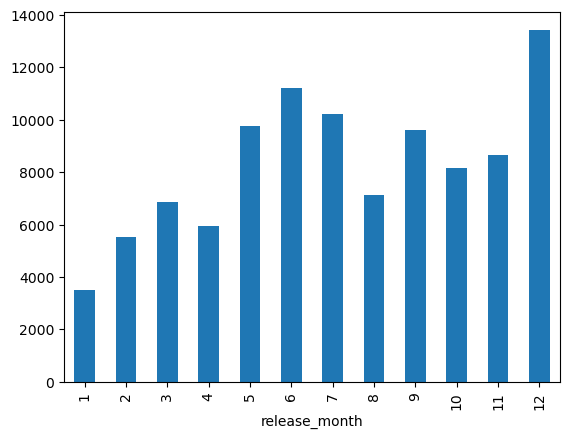

In [87]:
data_groupby_day_of_week = final_data.groupby(['release_month'])['runtime'].count()
data_groupby_day_of_week.plot(kind = 'bar')
plt.show()

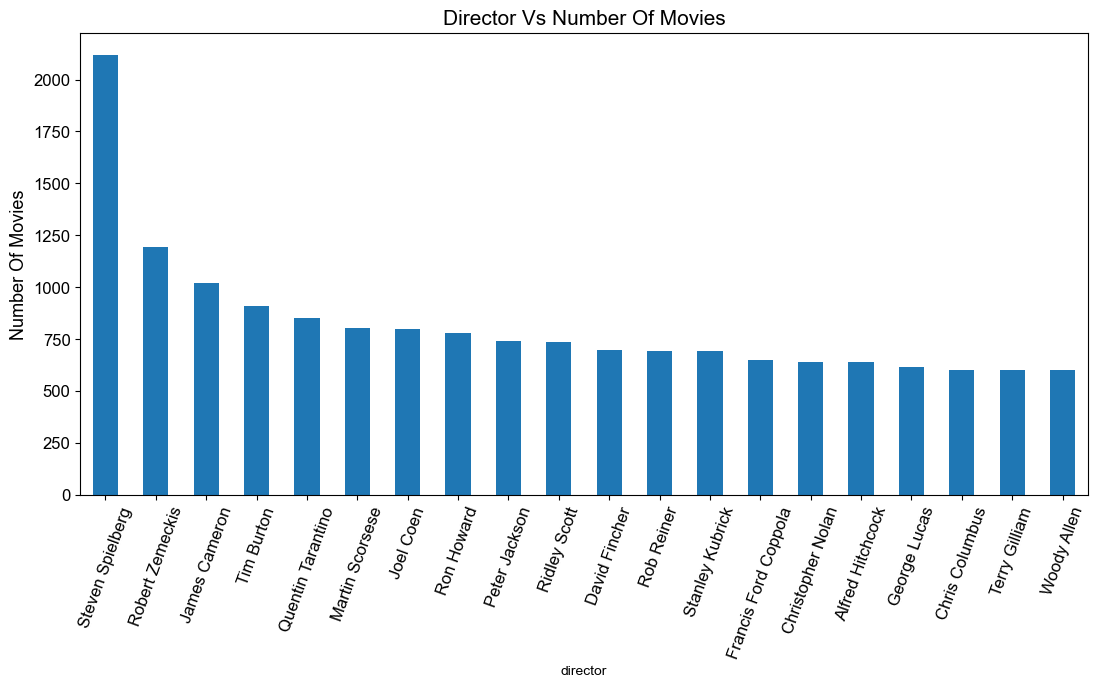

In [88]:
#plot a barh graph
final_data['director'].value_counts().iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

In [89]:
final_movie_data = final_data.copy()

In [90]:
final_movie_data['genres_category'] = final_movie_data['genres_category'].apply(lambda x:[i.replace(" ","") for i in x])
# final_movie_data['actors'] = final_movie_data['actors'].apply(lambda x:[i.replace(" ","") for i in x])
# final_movie_data['director'] = final_movie_data['crew'].apply(lambda x:[i.replace(" ","") for i in x])
final_movie_data['keywords_type'] = final_movie_data['keywords_type'].apply(lambda x:[i.replace(" ","") for i in x])

final_movie_data['actors'] = [','.join(map(str, l)) for l in final_movie_data['actors']]

final_movie_data['genres_category'] = final_movie_data['genres_category'].apply(lambda x:" ".join(x))
# final_movie_data['actors'] = final_movie_data['actors'].apply(lambda x:" ".join(x))
# final_movie_data['director'] = final_movie_data['crew'].apply(lambda x:" ".join(x))
final_movie_data['keywords_type'] = final_movie_data['keywords_type'].apply(lambda x:" ".join(x))
final_movie_data['languages_category'] = final_movie_data['languages_category'].apply(lambda x:" ".join(x))
final_movie_data['production_house'] = final_movie_data['production_house'].apply(lambda x:" ".join(x))
final_movie_data['production_country'] = final_movie_data['production_country'].apply(lambda x:" ".join(x))

In [91]:
final_movie_data = final_movie_data.drop(['rating', 'userId'], axis=1)

In [92]:
final_movie_data.duplicated().sum()

91086

In [93]:
final_movie_data = final_movie_data.drop_duplicates()
final_movie_data.head(3)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,production_house,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week
0,862,1,Toy Story,"Tom Hanks,Tim Allen,Don Rickles",John Lasseter,Animation Comedy Family,en,English,"Led by Woody, Andy's toys live happily in his ...",,...,Pixar Animation Studios,21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
247,8844,2,Jumanji,"Robin Williams,Jonathan Hyde,Kirsten Dunst",Joe Johnston,Adventure Fantasy Family,en,English Français,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,TriStar Pictures Teitler Film Interscope Commu...,17.015539,104.0,262797249.0,65000000.0,6.9,2413.0,1995,12,Friday
354,15602,3,Grumpier Old Men,"Walter Matthau,Jack Lemmon,Ann-Margret",Howard Deutch,Romance Comedy,en,English,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,...,Warner Bros. Lancaster Gate,11.712900,101.0,0.0,0.0,6.5,92.0,1995,12,Friday


#### Popularity Based Recommendation Systems

Popularity Based Recommendation Systems Using Pupularity, Vote_Count, Vote_Average:

1. We need a metric to score the movie.

2. Calculate score of every movie.

3. Sort the scores and recommend best rated movie to users

4. IMDB weighted average score formula is used to score the movies

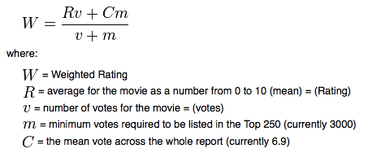

In [94]:
movie_popularity_based = final_movie_data.copy()
movie_popularity_based.head(3)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,production_house,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week
0,862,1,Toy Story,"Tom Hanks,Tim Allen,Don Rickles",John Lasseter,Animation Comedy Family,en,English,"Led by Woody, Andy's toys live happily in his ...",,...,Pixar Animation Studios,21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
247,8844,2,Jumanji,"Robin Williams,Jonathan Hyde,Kirsten Dunst",Joe Johnston,Adventure Fantasy Family,en,English Français,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,TriStar Pictures Teitler Film Interscope Commu...,17.015539,104.0,262797249.0,65000000.0,6.9,2413.0,1995,12,Friday
354,15602,3,Grumpier Old Men,"Walter Matthau,Jack Lemmon,Ann-Margret",Howard Deutch,Romance Comedy,en,English,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,...,Warner Bros. Lancaster Gate,11.712900,101.0,0.0,0.0,6.5,92.0,1995,12,Friday


In [95]:
m = movie_popularity_based['vote_count'].quantile(0.80)
m

508.0

In [96]:
C = movie_popularity_based['vote_average'].mean()
C

6.3666592674805775

In [97]:
movie_popularity = movie_popularity_based[movie_popularity_based['vote_count'] >= m]
movie_popularity.head(3)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,production_house,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week
0,862,1,Toy Story,"Tom Hanks,Tim Allen,Don Rickles",John Lasseter,Animation Comedy Family,en,English,"Led by Woody, Andy's toys live happily in his ...",,...,Pixar Animation Studios,21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
247,8844,2,Jumanji,"Robin Williams,Jonathan Hyde,Kirsten Dunst",Joe Johnston,Adventure Fantasy Family,en,English Français,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,TriStar Pictures Teitler Film Interscope Commu...,17.015539,104.0,262797249.0,65000000.0,6.9,2413.0,1995,12,Friday
482,949,6,Heat,"Al Pacino,Robert De Niro,Val Kilmer",Michael Mann,Action Crime Drama Thriller,en,English Español,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,...,Regency Enterprises Forward Pass Warner Bros.,17.924927,170.0,187436818.0,60000000.0,7.7,1886.0,1995,12,Friday


In [98]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

In [99]:
movie_popularity['score'] = movie_popularity.apply(weighted_rating,axis=1)
movie_popularity.head(2)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week,score
0,862,1,Toy Story,"Tom Hanks,Tim Allen,Don Rickles",John Lasseter,Animation Comedy Family,en,English,"Led by Woody, Andy's toys live happily in his ...",,...,21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday,7154.160186
247,8844,2,Jumanji,"Robin Williams,Jonathan Hyde,Kirsten Dunst",Joe Johnston,Adventure Fantasy Family,en,English Français,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,17.015539,104.0,262797249.0,65000000.0,6.9,2413.0,1995,12,Friday,6747.703257


In [100]:
movie_score = movie_popularity.sort_values('score', ascending = False)
movie_score[['title', 'vote_count', 'vote_average', 'score', 'popularity']].head()

,title,vote_count,vote_average,score,popularity
22016,The Godfather,6024.0,8.5,7561.299804,41.109264
9528,The Shawshank Redemption,8358.0,8.5,7561.149874,51.645403
30830,Once Upon a Time in America,1104.0,8.3,7461.892494,32.182851
30246,Psycho,2405.0,8.3,7460.307716,36.826309
28136,One Flew Over the Cuckoo's Nest,3001.0,8.3,7460.040636,35.529554


In [101]:
movie_popular = movie_popularity.sort_values('popularity', ascending = False)
movie_popular[['title', 'vote_count', 'vote_average', 'score', 'popularity']].head()

,title,vote_count,vote_average,score,popularity
99788,Minions,4729.0,6.4,6492.546829,547.488298
99158,Big Hero 6,6289.0,7.8,7204.977181,213.849907
99511,Deadpool,11444.0,7.4,7001.145524,187.860492
94146,Avatar,12114.0,7.2,6899.329893,185.070892
99116,John Wick,5499.0,7.0,6797.851063,183.870374


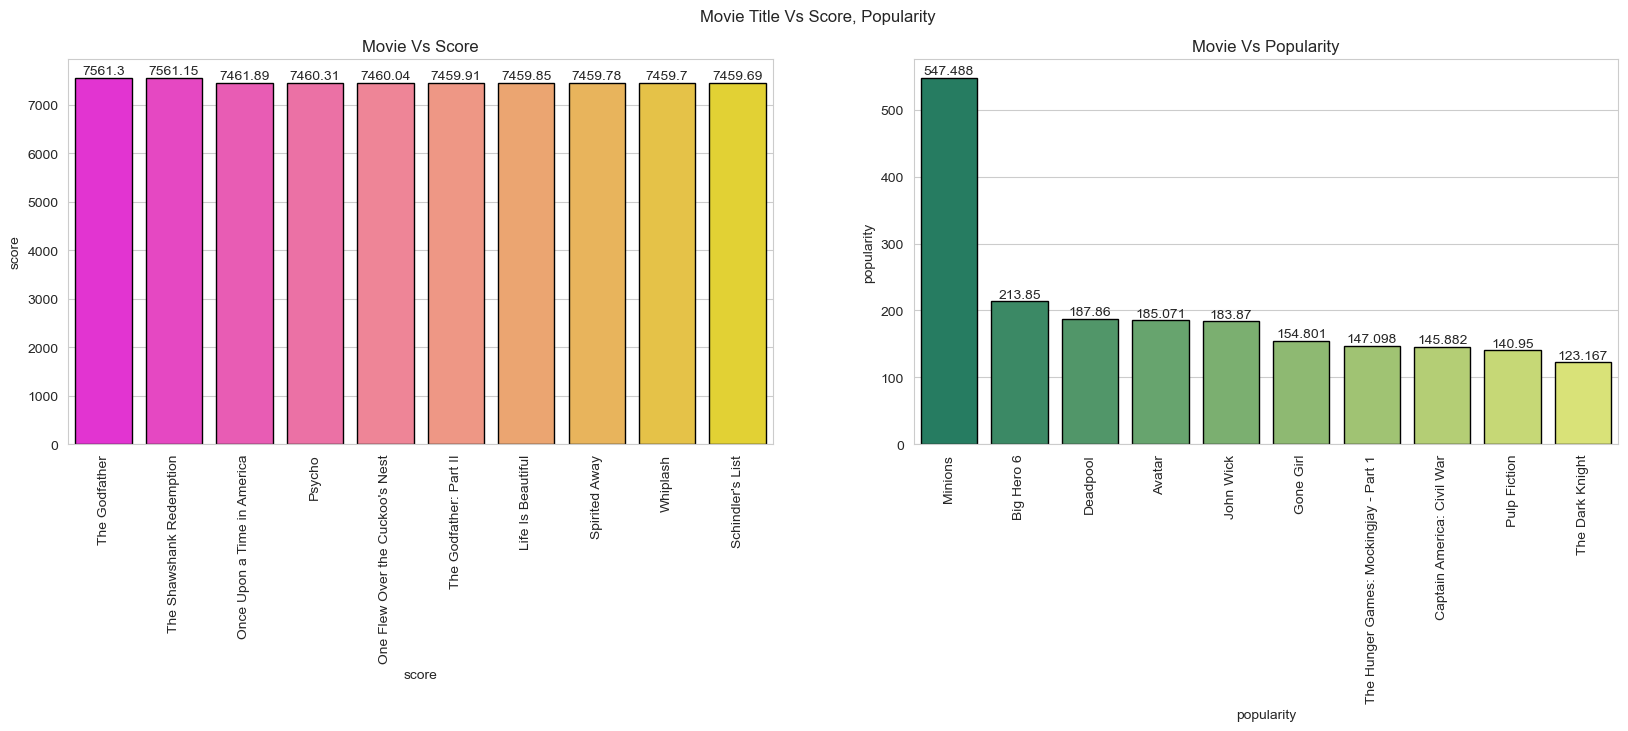

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
fig.suptitle('Movie Title Vs Score, Popularity')
axes[0].set_title('Movie Vs Score')
axes[1].set_title('Movie Vs Popularity')


ax = sns.barplot(data = movie_score.head(10), x='title', y='score', ax=axes[0], palette='spring', edgecolor ='black', ci=None)
for i in ax.containers:
    ax.bar_label(i,)

ax = sns.barplot(data = movie_popular.head(10), x='title', y='popularity', ax=axes[1], palette='summer', edgecolor ='black', ci=None)
for i in ax.containers:
    ax.bar_label(i,)
    
axes[0].set_xlabel('score')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


axes[1].set_xlabel('popularity')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

In [103]:
# from pickle import dump
# from pickle import load

In [104]:
# dump(movie_score,open('movies_popularity.pkl','wb'))

# dump(popularity,open('weight_average.pkl','wb'))

In [105]:
# popularity = load(open('movies_popularity.pkl', 'rb'))
# weighted_score = load(open('weight_average.pkl', 'rb'))

In [106]:
movie_score.head(2)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week,score
22016,238,858,The Godfather,"Marlon Brando,Al Pacino,James Caan",Francis Ford Coppola,Drama Crime,en,English Italiano Latin,"Spanning the years 1945 to 1955, a chronicle o...",An offer you can't refuse.,...,41.109264,175.0,245066411.0,6000000.0,8.5,6024.0,1972,3,Tuesday,7561.299804
9528,278,318,The Shawshank Redemption,"Tim Robbins,Morgan Freeman,Bob Gunton",Frank Darabont,Drama Crime,en,English,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,...,51.645403,142.0,28341469.0,25000000.0,8.5,8358.0,1994,9,Friday,7561.149874


In [107]:
movie_popular.head(2)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week,score
99788,211672,135887,Minions,"Sandra Bullock,Jon Hamm,Michael Keaton",Kyle Balda,Family Animation Adventure Comedy,en,English,"Minions Stuart, Kevin and Bob are recruited by...","Before Gru, they had a history of bad bosses",...,547.488298,91.0,1.156731e+09,74000000.0,6.4,4729.0,2015,6,Wednesday,6492.546829
99158,177572,115617,Big Hero 6,"Scott Adsit,Ryan Potter,Daniel Henney",Chris Williams,Adventure Family Animation Action Comedy,en,English,The special bond that develops between plus-si...,From the creators of Wreck-it Ralph and Frozen,...,213.849907,102.0,6.521054e+08,165000000.0,7.8,6289.0,2014,10,Friday,7204.977181


#### Demerits of the popularity based recommendation system

– Recommendations are not personalized as per user attributes and all users see the same recommendations irrespective of their preferences

– Another problem is that the number of reviews (which reflects the number of people who have viewed the movie) will vary for each movie and hence the average star rating will have discrepancies. 

– The system doesn’t take into account the regional and language preferences and might recommend movies in languages that a regional dialect speaking individual might not understand

#### Content-Based Recommendation Systems
 
Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions. It also considers the user's previous history in order to recommend a similar product.

In [108]:
movie_content_based = final_movie_data.copy()
movie_content_based.head(2)

,id,movieId,title,actors,director,genres_category,original_language,languages_category,overview,tagline,...,production_house,popularity,runtime,revenue,budget,vote_average,vote_count,release_year,release_month,release_day_of_week
0,862,1,Toy Story,"Tom Hanks,Tim Allen,Don Rickles",John Lasseter,Animation Comedy Family,en,English,"Led by Woody, Andy's toys live happily in his ...",,...,Pixar Animation Studios,21.946943,81.0,373554033.0,30000000.0,7.7,5415.0,1995,10,Monday
247,8844,2,Jumanji,"Robin Williams,Jonathan Hyde,Kirsten Dunst",Joe Johnston,Adventure Fantasy Family,en,English Français,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,...,TriStar Pictures Teitler Film Interscope Commu...,17.015539,104.0,262797249.0,65000000.0,6.9,2413.0,1995,12,Friday


In [109]:
movie_content_based['tags'] = movie_content_based['languages_category'] + ' ' + movie_content_based['keywords_type'] + movie_content_based['genres_category'] + movie_content_based['actors'] + movie_content_based['director'] + movie_content_based['production_house'] + movie_content_based['overview'] + movie_content_based['tagline']
movie_content_based = movie_content_based.drop(['id', 'actors', 'director', 'budget', 'original_language', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'keywords_type', 'genres_category', 'languages_category', 'production_country', 'production_house', 'release_year', 'release_month', 'release_day_of_week', 'tagline', 'overview'], axis = 1)
movie_content_based.head(2)

,movieId,title,tags
0,1,Toy Story,English jealousy toy boy friendship friends ri...
247,2,Jumanji,English Français boardgame disappearance based...


In [110]:
movie_content_based.shape

(9010, 3)

In [111]:
ps = PorterStemmer()

def stem(text):
    v = ' '.join([ps.stem(i) for i in text.split()])
    return v

movie_content_data = movie_content_based[['movieId','title','tags']]
movie_content_data['tags'] = movie_content_data.tags.apply(lambda x:x.lower())
movie_content_data['title'] = movie_content_data.title.apply(lambda x:x.lower())
movie_content_data['tags'].apply(stem)

0         english jealousi toy boy friendship friend riv...
247       english françai boardgam disappear basedonchil...
354       english fish bestfriend duringcreditssting old...
413       english basedonnovel interracialrelationship s...
426       english babi midlifecrisi confid age daughter ...
                                ...                        
100117    english sharkattack sequel farc lasvega creatu...
100118    friendship brickmakingdramasidney poitier,wend...
100119    हिन्दी bollywoodthril romanceakshay kumar,ilea...
100120    हिन्दी bollywoodadventur drama histori romance...
100121    english music documentarydocumentari musicpaul...
Name: tags, Length: 9010, dtype: object

In [112]:
cvect = CountVectorizer(max_features = 5000, stop_words = 'english')
vectors = cvect.fit_transform(movie_content_data['tags']).toarray()

In [113]:
vectors.shape

(9010, 5000)

In [114]:
similarity = cosine_similarity(vectors)

In [115]:
similarity

array([[1.        , 0.03883678, 0.02214037, ..., 0.        , 0.        ,
        0.03776275],
       [0.03883678, 1.        , 0.06577935, ..., 0.        , 0.0418121 ,
        0.05609682],
       [0.02214037, 0.06577935, 1.        , ..., 0.03042903, 0.04767313,
        0.04264014],
       ...,
       [0.        , 0.        , 0.03042903, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.0418121 , 0.04767313, ..., 0.        , 1.        ,
        0.        ],
       [0.03776275, 0.05609682, 0.04264014, ..., 0.        , 0.        ,
        1.        ]])

In [116]:
movie_content_based = movie_content_based.reset_index()
titles = movie_content_based['title']
indices = pd.Series(movie_content_based.index, index=movie_content_based['title'])

#### Testing and Prediction of Content-Based Recommendation System

In [117]:
# movie_content_based[movie_content_based['title'] == 'The Lego Movie'].index[0]

In [118]:
# def recommend(movie):
#     movie = movie.lower()
#     movie_index = movie_content_based[movie_content_based['title'] == movie].index[0]
#     distances = similarity[movie_index]
#     movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:6]
#     for i in movies_list:
#         print(movie_content_based.iloc[i[0]].title)


def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [119]:
get_recommendations('The Godfather').head(10)

974       The Godfather: Part II
4783              Mambo Italiano
1383     The Replacement Killers
8994             The Maid's Room
7296                 City Island
5580                      Eulogy
1184               Donnie Brasco
3715                    3 Ninjas
2885    The Myth Of Fingerprints
4158      The Master of Disguise
Name: title, dtype: object

In [120]:
get_recommendations('The Dark Knight').head(10)

6128                              Batman Begins
7900                      The Dark Knight Rises
524                                      Batman
7537                 Batman: Under the Red Hood
8844         Batman v Superman: Dawn of Justice
7870                           Batman: Year One
1240                             Batman & Robin
7902         Sherlock Holmes: A Game of Shadows
8824                              Suicide Squad
8127    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

In [121]:
get_recommendations('Minions').head(10)

8285         Despicable Me 2
7208                Year One
1822           One Tough Cop
7783                  Cars 2
1648     The Return of Jafar
8624          Doctor Strange
8444          The Lego Movie
7799              The Smurfs
8417    Death of a Superhero
7258                 G-Force
Name: title, dtype: object

In [122]:
import pickle 
pickle.dump(movie_content_data, open('movie_content_based.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl','wb'))

#### Disadvantages
1. Different products do not get much exposure to the user.
2. Businesses cannot be expanded as the user does not try different types of products.

#### Collaberative Based Recommendation System

##### Item-based collaborative filtering
The concept in this case is to find similar movies instead of similar users and then recommending similar movies.

In [123]:
ratings_small.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [124]:
reader = Reader()

data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
# data.split(n_folds=5)

# Load the dataset (download it if needed)
# data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8932  0.9071  0.8957  0.8951  0.8957  0.8973  0.0050  
MAE (testset)     0.6904  0.6985  0.6879  0.6907  0.6897  0.6914  0.0037  
Fit time          0.84    0.87    0.86    0.84    1.12    0.91    0.11    
Test time         0.12    1.18    0.13    0.13    0.12    0.34    0.42    


{'test_rmse': array([0.89319261, 0.90710802, 0.89565129, 0.89505435, 0.89572143]),
 'test_mae': array([0.69042266, 0.69852758, 0.6879265 , 0.69065165, 0.68972006]),
 'fit_time': (0.8374826908111572,
  0.8654928207397461,
  0.8592140674591064,
  0.8404743671417236,
  1.1230134963989258),
 'test_time': (0.12230253219604492,
  1.1801435947418213,
  0.13383984565734863,
  0.1304020881652832,
  0.12291717529296875)}

In [125]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [126]:
ratings_small[ratings_small['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [127]:
algo.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.562309855753645, details={'was_impossible': False})

#### Hybrid Recommendation System

In [128]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [129]:
id_map = links_small[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(final_movie_data[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [130]:
indices_map = id_map.set_index('id')

In [131]:
def hybrid_recommendation(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(similarity[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = final_movie_data.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: algo.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [132]:
hybrid_recommendation(1, 'Avatar')

,title,vote_count,vote_average,release_year,id,est
95986,X-Men: First Class,5252.0,7.1,2011,49538,3.109393
96212,Rise of the Planet of the Apes,4452.0,7.0,2011,61791,3.026707
31966,The Day the Earth Stood Still,323.0,7.3,1951,828,2.994835
99781,Independence Day: Resurgence,2550.0,4.9,2016,47933,2.790696
88408,X-Men: The Last Stand,3581.0,6.3,2006,36668,2.761670
95194,Wall Street: Money Never Sleeps,504.0,5.8,2010,33909,2.732078
82218,Enemy Mine,253.0,6.7,1985,11864,2.715223
99180,The Book of Life,778.0,7.3,2014,228326,2.681271
64884,Alien Nation,81.0,5.9,1988,10128,2.673790
65302,Titan A.E.,320.0,6.3,2000,7450,2.640789


In [133]:
hybrid_recommendation(3, 'Minions')

,title,vote_count,vote_average,release_year,id,est
46384,Watership Down,159.0,7.3,1978,11837,3.762626
98438,Death of a Superhero,44.0,6.9,2011,91551,3.688491
98488,The Lego Movie,3127.0,7.5,2014,137106,3.682858
34174,The Man Who Would Be King,148.0,7.6,1975,983,3.608574
96478,The Adventures of Tintin,2095.0,6.7,2011,17578,3.534850
99212,Doctor Strange,74.0,6.6,2007,14830,3.516182
96151,Captain America: The First Avenger,7174.0,6.6,2011,1771,3.512184
85561,The Yes Men,28.0,7.0,2003,3396,3.470658
99545,The Pacific,318.0,7.9,2010,189197,3.446099
100066,Grimsby,794.0,5.7,2016,267193,3.423568


In [134]:
# pd.show_versions()

In [135]:
# pip install --upgrade pandas

In [144]:
# !pip install bz2file

In [138]:
import bz2file as bz2

In [142]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

In [143]:
compressed_pickle('compressed_similarity', similarity)

In [ ]:
# def decompress_pickle(file):
#     data = bz2.BZ2File(file, ‘rb’)
#     data = pickle.load(data)
#     return data

In [ ]:
# model = decompress_pickle(‘filename.pbz2’)

In [ ]:
# dump(similarity, open(r'F:\Priya\Courses\Innomatics\Final Project\models\similarity.pkl', 'wb'))
# with mgzip.open(r'F:\Priya\Courses\Innomatics\Final Project\models', 'wb') as f:
#     pickle.dump(compressed_similarity, f)